# Ejercicios de gradientes

## Punto 1

Supongamos los siguientes elementos:
$$
\begin{gather}
y = \begin{bmatrix}
   y_1 \\
   y_2
\end{bmatrix} \\
H = \begin{bmatrix}
   h_{11} & h_{12} \\
   h_{21} & h_{22}
\end{bmatrix} \\
x = \begin{bmatrix}
   x_1 \\
   x_2
\end{bmatrix}
\end{gather}
$$

Inciso 1

$$
\begin{gather}
f(x) = \Vert y - Hx\Vert^2_2 \\
\boxed{\nabla f = -2 H^T (y - H x)}
\end{gather}
$$

Inciso 2

$$
\begin{gather}
f(x) = \Vert y - Hx\Vert_2 \\
\boxed{\nabla f = -\frac{1}{||y - Hx||_2} H^T(y - HX)}
\end{gather}
$$

Inciso 3

$$
\begin{gather}
f(x) = \Vert y - Hx\Vert_1 \\
si\ z = Hx, \\
\nabla f(x) = \sum \nabla |y_i - z_i| \\
\nabla f(x) = \sum{(y_i - z_i) \frac{1}{|y_i - z_i|}} \\
\boxed{\nabla f(x) = \sum{ \frac{(y_i - z_i)}{|y_i - z_i|}}}
\end{gather}
$$

# Interpretando

La imagen $Y \in \mathbb{R}^{128 \times 64}$ se define como el producto entre $H \in \mathbb{R}^{128 \times 64}$ y $X \in \mathbb{R}^{64 \times 64}$.

$$
Y = HX
$$

## Inciso a

Definimos la función de costo a optimizar, en este caso, queremos que la diferencia entre la imagen encriptada $Y$ y la multiplicación de la transformación $H$ por la imagen original $X$ sea la mínima. Como la diferencia mínima será 0, entonces la matriz que representa las diferencias valor a valor será la matriz cero $0 \in \mathbb{R}^{128 \times 64}$, que representa nuestro **valor óptimo**.

$$
f(X) = Y - HX
$$

Si $f(X') = 0$ entonces decimos que $X'$ será el **óptimo**. El óptimo en nuestro caso será la imagen original, que es desconocida. Una transformación que podemos hacer a $f(X)$ para que nos produza un valor en $\mathbb{R}$ es usar la norma $\ell_2$, entonces:

$$
\begin{gather}
\begin{Vmatrix}
f(X)
\end{Vmatrix}^2_2 =
\begin{Vmatrix}
Y - HX
\end{Vmatrix}^2_2 
\end{gather}
$$

Finalmente, formulamos el problema de optimización:
$$
\begin{matrix}
minimize & \begin{Vmatrix}
Y - HX
\end{Vmatrix}^2_2 \\
X \in \mathbb{R}^{64 \times 64}
\end{matrix}
$$


## Inciso b

Simplificamos la norma $\ell_2$ para operar el gradiente después:

$$
\begin{gather}
g(x) = \begin{Vmatrix}
f(X)
\end{Vmatrix}^2_2 \\
g(x) =
\begin{Vmatrix}
Y - HX
\end{Vmatrix}^2_2 \\
\boxed{g(x) = -2 H^T (Y - H X)}
\end{gather}
$$

Calculamos el gradiente cuando es cero, en este caso, se tiene que usar la ecuación de la pseudo-inversa para resolver la norma $\ell_2$.

$$
\begin{gather}
\nabla g(x) = 0 \\
\left(-\frac{1}{2}\right) -2 H^T (Y - H X) = \left(-\frac{1}{2}\right) 0 \\
H^T (Y - H X) = 0
\end{gather}
$$

Aplicamos teorema de factor nulo, es decir, observamos los casos para cada uno de los factores cuando es cero.

$$
H^T = 0\ \lor (Y - H X) = 0
$$

Sabemos que $H^T \neq 0$ porque $H \neq 0$. Nos queda evaluar la segunda expresión.

$$
\begin{gather}
\boxed{Y - H X = 0}
\end{gather}
$$

## Inciso c

Como la matriz $H$ no es cuadrada no tiene inversa, sin embargo, podemos calcular su pseudo-inversa.

$$
\begin{gather}
Y - H X = 0 \\
Y = HX \\
H^+ Y = X \\
\boxed{X = (H^T H)^{-1} H^T Y} 
\end{gather}
$$

## Inciso d

Implementamos la ecuación obtenida.

In [1]:
!pip install scipy
!pip install matplotlib
!pip install numpy

In [2]:
import scipy.io as scp
import numpy as np
import matplotlib.pyplot as plt

data = scp.loadmat("../resources/images/lab3/encripada.mat")
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'H', 'y'])


Text(0.5, 1.0, 'Pattern')

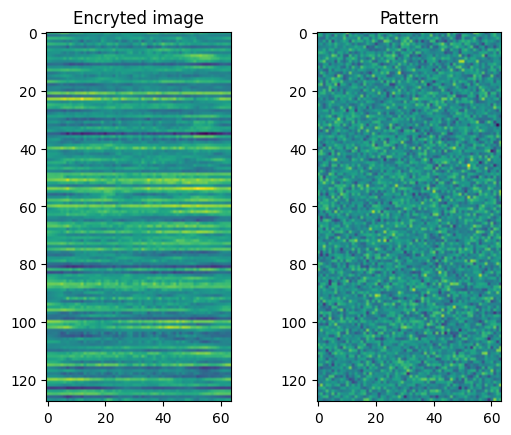

In [3]:
Y_image = data["y"]
H_image = data["H"]

plt.subplot(1,2,1)
plt.imshow(Y_image)
plt.title("Encryted image")
plt.subplot(1,2,2)
plt.imshow(H_image)
plt.title("Pattern")

Text(0.5, 1.0, 'Original image')

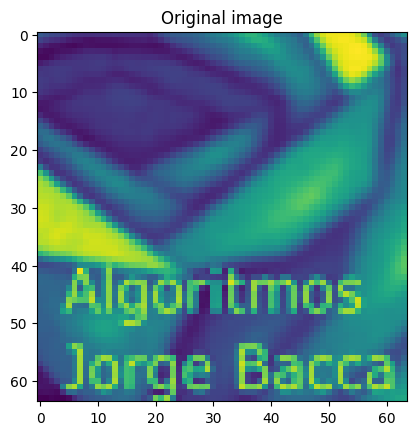

In [4]:
H_transpose = np.transpose(np.copy(H_image))
X_image = np.linalg.inv(H_transpose.dot(H_image)).dot(H_transpose).dot(Y_image)

plt.imshow(X_image)
plt.title("Original image")